I'll start this task by importing the necessary Python libraries ...

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

... and the dataset:

In [27]:
data = pd.read_csv('WeatherForecastingData/DailyDelhiClimateTrain.csv')
display(data)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


I took a look if the dataset has any null values or not:

In [28]:
display(data.isna().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Then, I take a look at the descriptive statistics of this data before moving forward:

In [29]:
display(data.describe())

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Now, I want the information about all the columns in the dataset:

In [30]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


None

The date column in this dataset is not having a datetime data type, I will change it needed. Now I want to have a look at the mean temperature in Delhi over the years:

In [31]:
figure = px.line(data,
                 x='date',
                 y='meantemp',
                 title='Mean Temperature in Delhi Over the Years')
figure.show()

Now, I'll have a look at the humidity in Delhi over the years:

In [32]:
figure = px.line(data,
                 x='date',
                 y='humidity',
                 title='Humidity in Delhi Over the Years')
figure.show()

Now I take a look at the wind speed in Delhi over the years:

In [33]:
figure = px.line(data,
                 x='date',
                 y='wind_speed', 
                 title='Wind Speed in Delhi Over the Years')
figure.show()

Till 2015, the wind speed was higher during monsoons (August & September) and retreating monsoons (December & January). After 2015, there were no anomalies in wind speed during monsoons. Now I want to see the relationship between temperature and humidity:

In [34]:
figure = px.scatter(data_frame = data, x='humidity',
                    y='meantemp', size='meantemp', 
                    trendline='ols', 
                    title = 'Relationship Between Temperature and Humidity')
figure.show()

There’s a negative correlation between temperature and humidity in Delhi. It means higher temperature results in low humidity and lower temperature results in high humidity.

# Analyzing Temperature Change

Now I'll analyze the temperature change in Delhi over the years. For this task, I will first convert the data type of the date column into datetime, then I will add two new columns in the dataset for year and month values.

Here’s how I did the data type and extract year and month data from the date column:

In [35]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
display(data.head())

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


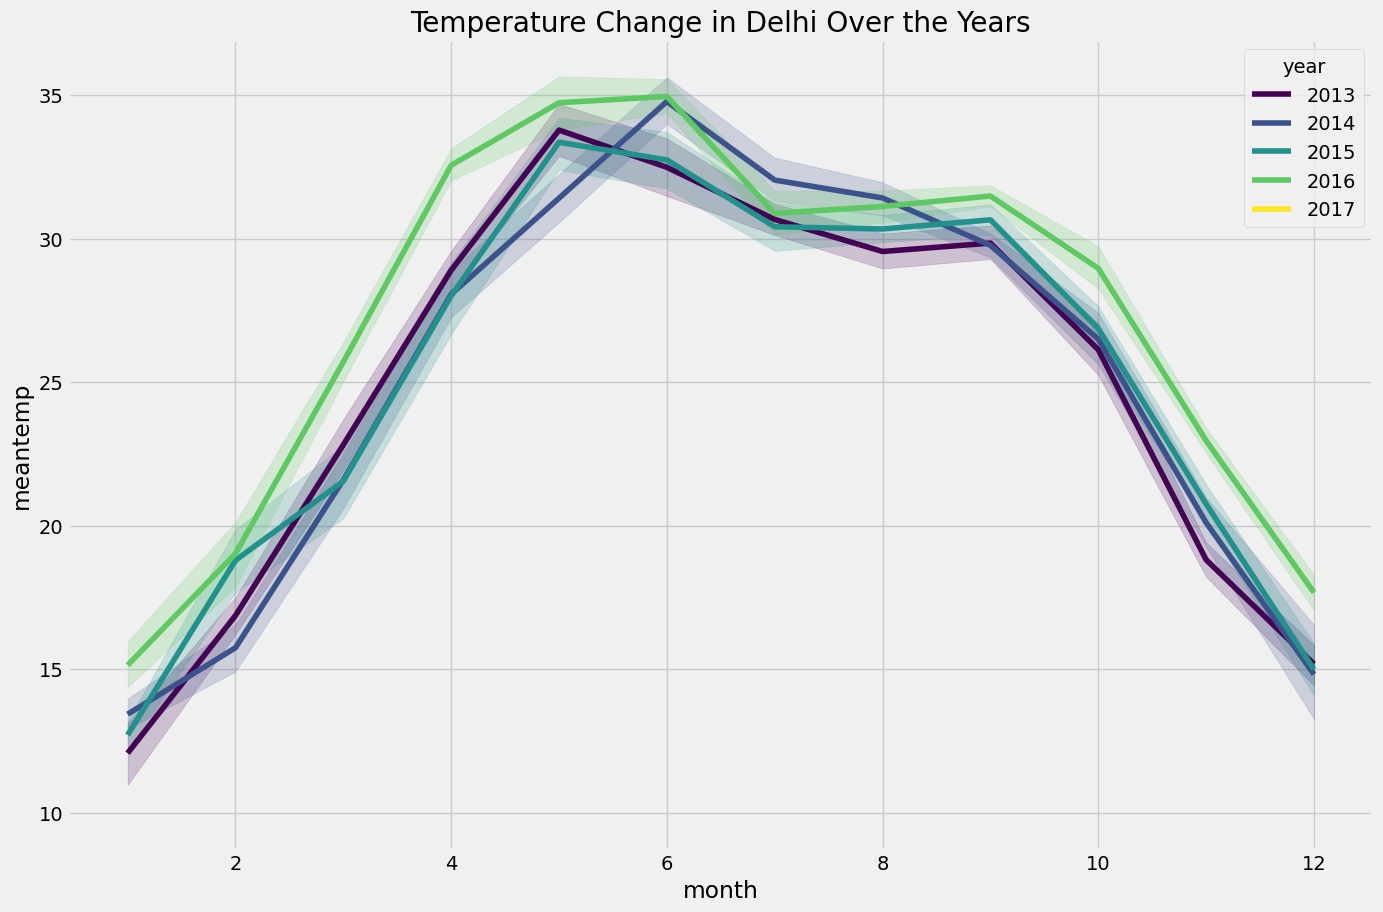

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title('Temperature Change in Delhi Over the Years')
sns.lineplot(data = data,
             palette='viridis',
             x='month',
             y='meantemp',
             hue='year')
plt.show()

Although 2017 was not the hottest year in the summer, we can see a rise in the average temperature of Delhi every year.

I will be using the Facebook prophet model for this task, is one of the best techniques for time series forecasting available. The prophet model accepts time data named as “ds”, and labels as “y”. So let’s convert the data into this format:



In [37]:
forecast_data = data.rename(columns = {'date': 'ds', 
                                       'meantemp': 'y'})
display(forecast_data)

,ds,y,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016,12
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016,12
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016,12
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016,12


In [40]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

13:30:03 - cmdstanpy - INFO - Chain [1] start processing
13:30:03 - cmdstanpy - INFO - Chain [1] done processing
